# Keras cnn classifier.
this classifier is corresponding with CS231n homework assign2 cnn homework.
* 7x7 layer Conv layer with 32 filters
* ReLu Activation Layer
* BN Layer
* 2x2 Max Polling Layer
* Dense Layer with 1024 output units.
* ReLU
* Dense Layer with 10 outputs.

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, Flatten, BatchNormalization, MaxPool2D
from data_utils import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3
set_session(tf.Session(config=config))

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
# get data
cifar10_data = CIFAR10Data()
x_train, y_train, x_test, y_test = cifar10_data.get_data(subtract_mean=True)

CIFAR10 Training data shape: (50000, 32, 32, 3)
CIFAR10 Training label shape (50000, 1)
CIFAR10 Test data shape (10000, 32, 32, 3)
CIFAR10 Test label shape (10000, 1)


# First, we implement a very simple cnn for test.
* 7x7 layer conv with 32 filters, stride is (2,2)
* ReLU
* Dense Layer
* SVM

In [29]:
from classifiers.simple_cnn import simple_cnn
from keras.optimizers import Adam

num_classes = 10
simple_model = simple_cnn(classes=num_classes, input_shape=x_train.shape[1:])
simple_model.compile(optimizer=Adam(lr=5e-4),
                     loss=keras.losses.categorical_hinge,
                     metrics=['accuracy'],
                     )
simple_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 13, 13, 32)        4736      
_________________________________________________________________
activation_22 (Activation)   (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                54090     
_________________________________________________________________
activation_23 (Activation)   (None, 10)                0         
Total params: 58,826
Trainable params: 58,826
Non-trainable params: 0
_________________________________________________________________


In [30]:
simple_model.fit(x_train, y_train, batch_size=64, epochs=1, validation_split=0.2)


loss, acc = simple_model.evaluate(x_test, y_test)
print('evaluate loss :%f acc:%f' % (loss, acc))

Train on 40000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 1s 111us/step
evaluate loss :3.658973 acc:0.346200


# Now, implement a complex model.
* 7x7 layer Conv layer with 32 filters
* BN Layer
* ReLu Activation Layer
* 2x2 Max Polling Layer
* Dense Layer with 1024 output units.
* BN Layer
* ReLU
* Dense Layer with 10 outputs.

In [31]:
from classifiers.simple_cnn import complex_cnn
from keras.optimizers import RMSprop

complex_model = complex_cnn(classes=num_classes, input_shape=x_train.shape[1:])
complex_model.compile(optimizer=keras.optimizers.RMSprop(lr=1e-3),
                      loss=keras.losses.categorical_crossentropy,
                      metrics=['accuracy'],
                      )
complex_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 32)        4736      
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_24 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 1024)              8389632   
_________________________________________________________________
batch_normalization_8 (Batch (None, 1024)              4096      
__________

In [32]:
history = complex_model.fit(x_train, y_train, batch_size=64, epochs=5, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 11s 276us/step - loss: 1.4680 - acc: 0.4953 - val_loss: 1.1996 - val_acc: 0.5838
Epoch 2/5
40000/40000 [==============================] - 10s 247us/step - loss: 1.0360 - acc: 0.6390 - val_loss: 1.0874 - val_acc: 0.6267
Epoch 3/5
40000/40000 [==============================] - 10s 252us/step - loss: 0.8251 - acc: 0.7097 - val_loss: 1.0533 - val_acc: 0.6477
Epoch 4/5
40000/40000 [==============================] - 10s 250us/step - loss: 0.6469 - acc: 0.7758 - val_loss: 1.0475 - val_acc: 0.6657
Epoch 5/5
40000/40000 [==============================] - 10s 241us/step - loss: 0.4810 - acc: 0.8336 - val_loss: 1.0902 - val_acc: 0.6657


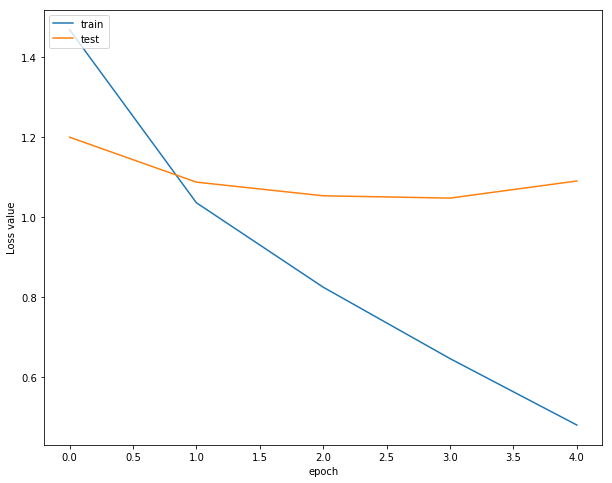

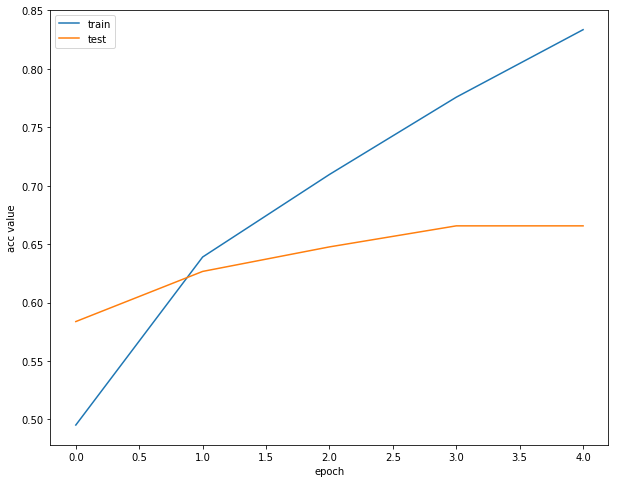

In [33]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('Loss value')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('acc value')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [34]:
# evaluate
loss, acc = complex_model.evaluate(x_test, y_test)
print('evaluate loss :%f acc:%f' % (loss, acc))

10000/10000 [==============================] - 1s 130us/step
evaluate loss :1.091966 acc:0.667500
